## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [11]:
# Q1.1 Run the code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

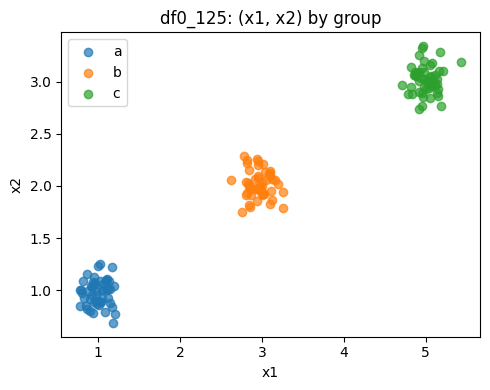

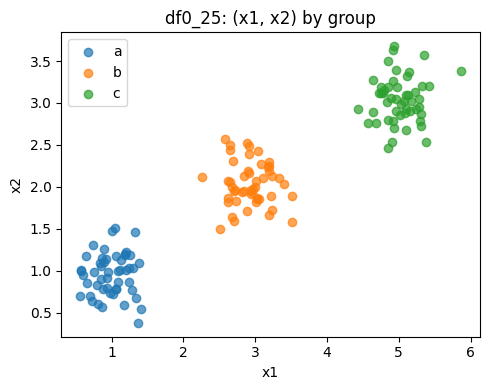

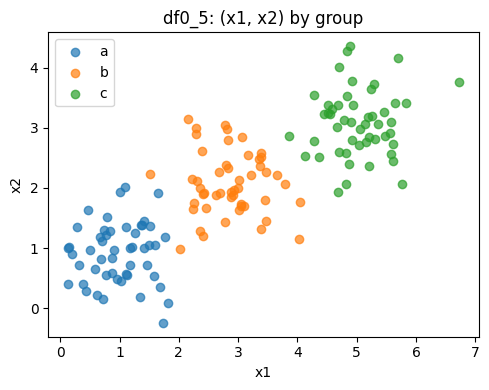

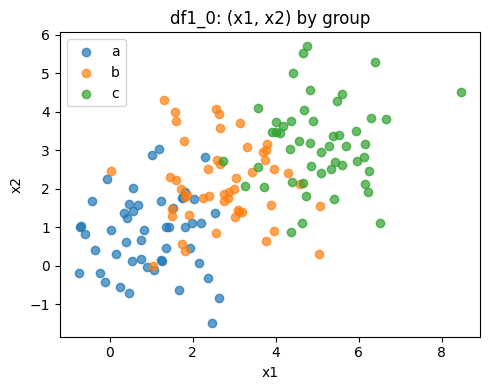

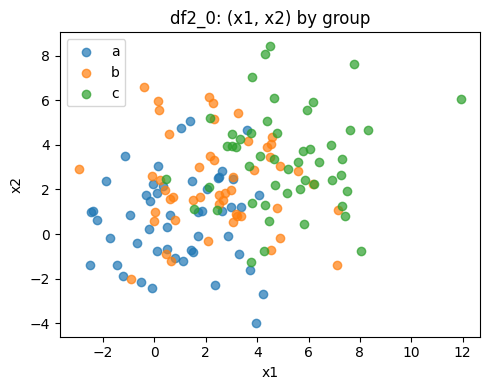

In [12]:
# Q1.2 Make scatterplots
datasets = {
    "df0_125": df0_125,
    "df0_25": df0_25,
    "df0_5": df0_5,
    "df1_0": df1_0,
    "df2_0": df2_0
}

for name, df in datasets.items():
    plt.figure(figsize=(5, 4))
    for g in df["group"].unique():
        sub = df[df["group"] == g]
        plt.scatter(sub["x1"], sub["x2"], alpha=0.7, label=g)
    plt.title(f"{name}: (x1, x2) by group")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

As the noise rises from 0.125 to 2.0, the scatter plot go from tight and clearly separate to more scattered across the graph.

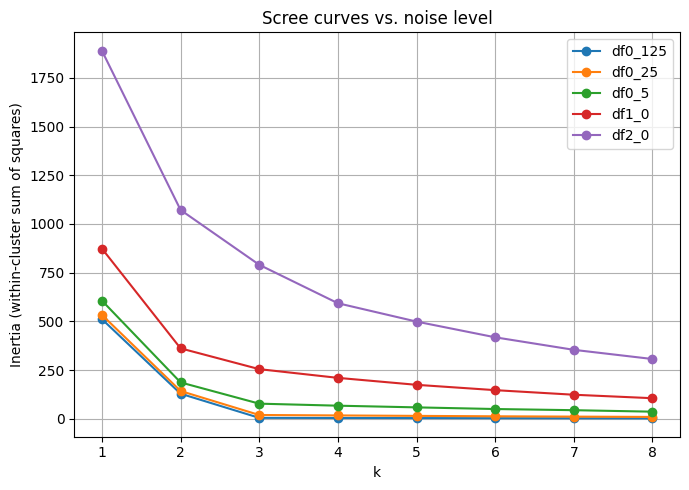

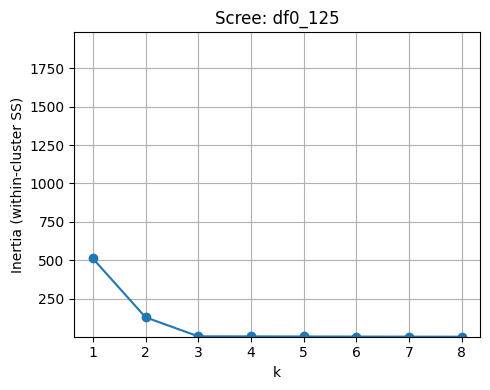

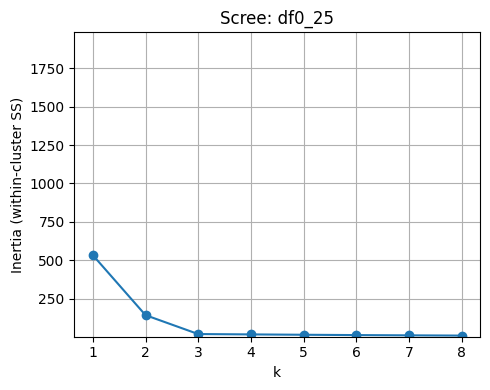

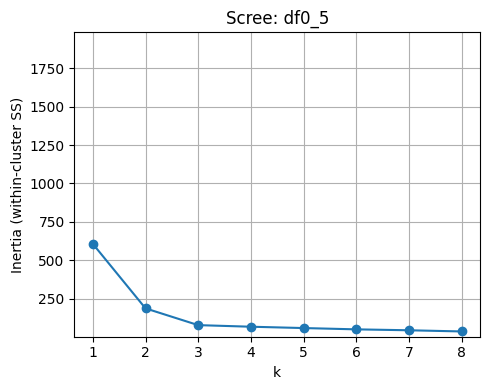

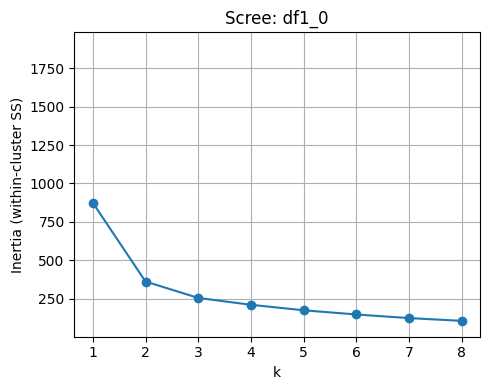

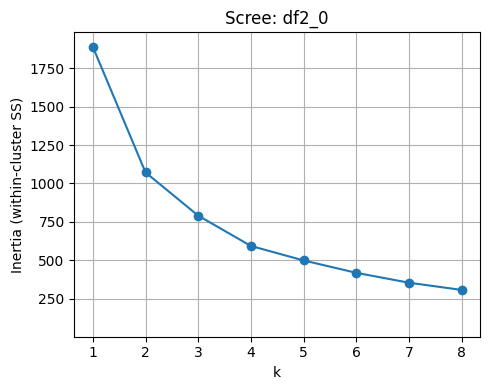

In [14]:
# Q1.3 Scree plot
def scree(df, max_k=8, random_state=42):
    X = df[["x1","x2"]].to_numpy()
    inertias = []
    for k in range(1, max_k+1):
        km = KMeans(n_clusters=k, n_init=20, random_state=random_state)
        km.fit(X)
        inertias.append(km.inertia_)
    return inertias

ks = list(range(1, 9))

# Combined scree
plt.figure(figsize=(7,5))
all_inertias = {} # Initialize all_inertias dictionary
for label, df in datasets.items():
    current_inertias = scree(df) # Calculate inertias for the current dataset
    plt.plot(ks, current_inertias, marker="o", label=label)
    all_inertias[label] = current_inertias # Store inertias in the dictionary
plt.title("Scree curves vs. noise level")
plt.xlabel("k"); plt.ylabel("Inertia (within-cluster sum of squares)")
plt.xticks(ks); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# One scree plot per dataset
ymax = max(max(v) for v in all_inertias.values())
ymin = min(min(v) for v in all_inertias.values())

for name, vals in all_inertias.items():
    plt.figure(figsize=(5,4))
    plt.plot(ks, vals, marker="o")
    plt.title(f"Scree: {name}")
    plt.xlabel("k"); plt.ylabel("Inertia (within-cluster SS)")
    plt.xticks(ks); plt.grid(True)
    plt.ylim(ymin * 0.95, ymax * 1.05)   # keep vertical scale consistent
    plt.tight_layout(); plt.show()

With low noise there is a sharp elbow around k = 3 and inertia is small, so picking k=3 is easy.
With medium noise (0.5–1.0) the elbow is weaker and inertia is higher, so k=3 still fits but is less obvious.
With high noise (2.0) the curve is smooth with no clear elbow and very high inertia, making a single best k hard to choose.

In [ ]:
# Q1.4 Explain the intuition of the elbow

Adding more clusters always lowers the error, but the big drops stop once you reach the real number of groups. After that, extra clusters only trim noise and the curve flattens.

In this simulation the big drop stops near k=3 when data are clean; as noise grows, the signal is hidden, the curve smooths, and the elbow disappears.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [15]:
# Q2.1 Load dataset and clean it
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

# Load and clean the dataset
df = pd.read_csv('/content/2022 election cycle fundraising.csv')

# Define columns
ID_COL = 'Member'
money_cols = ['Raised', 'Spent', 'Cash on Hand', 'Debts']

# Helper to coerce money to numeric
def money_to_float(s):
    if pd.isna(s):
        return np.nan
    # Handle cases where input is already a number (int or float)
    if isinstance(s, (int, float)):
        return float(s)

    s = str(s).strip()
    if s == "" or s.lower() in {"nan", "na", "none"}:
        return np.nan
    neg = False
    if s.startswith("(") and s.endswith(")"):
        neg = True
        s = s[1:-1]
    s = s.replace("$", "").replace(",", "").replace("+", "").strip()
    try:
        val = float(s)
    except Exception:
        # try to pull any number from the string
        m = re.search(r"-?\d+(\.\d+)?", s)
        val = float(m.group()) if m else np.nan
    return -val if neg else val

df = df.copy()
for c in money_cols:
    df[c] = df[c].map(money_to_float)

# Drop rows with all-NaN money fields
df_money = df.dropna(subset=money_cols, how="all").reset_index(drop=True)

# Show total rows and columns
print("Shape (rows, columns):", df_money.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
print(df_money.head())

# Check for any remaining NAs in the money columns
print("\nMissing values per money column:")
print(df_money[money_cols].isna().sum())

Shape (rows, columns): (537, 9)

First 5 rows:
   index              Member       Party       State Chamber      Raised  \
0      0  Abigail Spanberger  Democratic    Virginia   House   7719396.0   
1      1      Adam Kinzinger  Republican    Illinois   House   2192741.0   
2      2         Adam Schiff  Democratic  California   House  20993041.0   
3      3          Adam Smith  Democratic  Washington   House   1211111.0   
4      4        Adrian Smith  Republican    Nebraska   House   1617611.0   

        Spent  Cash on Hand  Debts  
0   7449678.0      851851.0    0.0  
1   1243502.0     2472888.0    0.0  
2  13957854.0    20942888.0    0.0  
3   1173466.0      623472.0    0.0  
4   1664674.0     1098579.0    0.0  

Missing values per money column:
Raised          0
Spent           0
Cash on Hand    0
Debts           0
dtype: int64


I picked the four money columns (Raised, Spent, Cash on Hand, Debts), and converted every dollar string to a real number. The cleaner removes dollar signs, commas, and plus signs, treats values in parentheses as negatives, and turns blanks or “NA” into missing values. If a value is already numeric, it is kept. I also drop rows where all four money fields are missing, leaving a cleaned table (df_money) ready for normalization and clustering.

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt

def scree(df, cols, max_k=10, random_state=42, scale=True):
    A = df.dropna(subset=cols)[cols].to_numpy()
    if scale:
        A = minmax_scale(A)
    inertias = []
    for k in range(1, max_k+1):
        km = KMeans(n_clusters=k, n_init=50, random_state=random_state).fit(A)
        inertias.append(km.inertia_)
    return inertias

def run_pair_multi_k(df_in, cols, title_prefix, k_list, seed=42):
    d = df_in.dropna(subset=cols).copy()
    X = minmax_scale(d[cols].to_numpy())

    # Scree on the same scaled data
    ks = range(1, 11)
    inertias = scree(d, cols, max_k=10, random_state=seed, scale=True)
    plt.figure(figsize=(6,4))
    plt.plot(list(ks), inertias, marker="o")
    plt.title(f"Scree: {title_prefix} {cols}")
    plt.xlabel("k"); plt.ylabel("Inertia"); plt.grid(True); plt.tight_layout(); plt.show()

    results = {}
    for k in k_list:
        km = KMeans(n_clusters=k, n_init=50, random_state=seed).fit(X)
        labels = km.labels_
        results[k] = {"labels": labels, "centers": km.cluster_centers_}

        plt.figure(figsize=(5,4))
        plt.scatter(X[:,0], X[:,1], c=labels, alpha=0.85)
        plt.title(f"{title_prefix} {cols} — k={k}")
        plt.xlabel(cols[0] + " (min–max)")
        plt.ylabel(cols[1] + " (min–max)")
        plt.tight_layout(); plt.show()
    return results

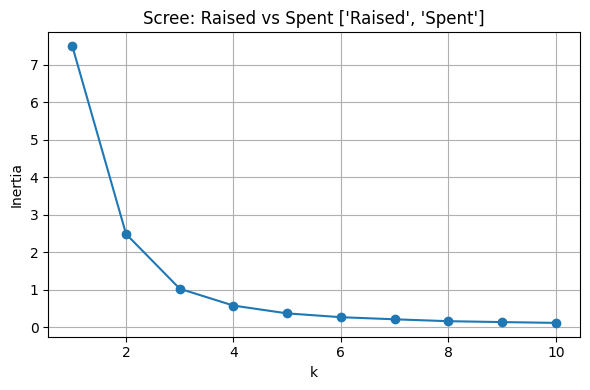

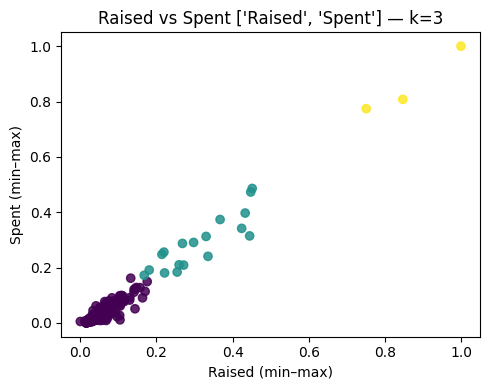

In [20]:
# Q2.2 Max-min normalize Raised and Spent
res_rs = run_pair_multi_k(df_money, ['Raised','Spent'], "Raised vs Spent", k_list=[3])

After min–max scaling Raised and Spent, the points line up along a near-diagonal. Candidates who raised more also spent more. Most candidates sit near the origin, with a few very expensive races far out to the right. The scree curve drops fast to about k=3 and then flattens, so 3 clusters is a sensible choice. In the colored scatter, the tiniest groups are the extreme outliers. The smallest cluster (size 1) is Raphael Warnock, and the next smallest (size 2) are Mark Kelly and Val Demings.

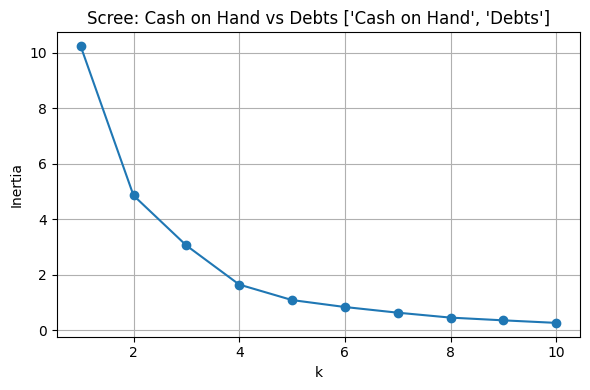

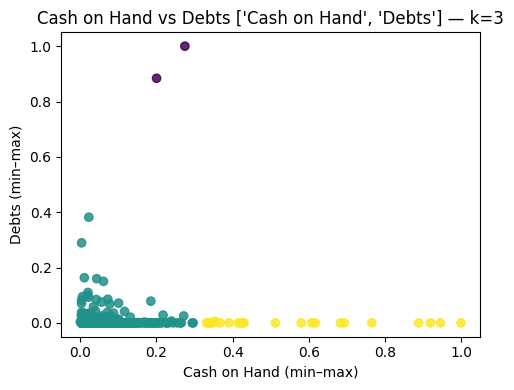

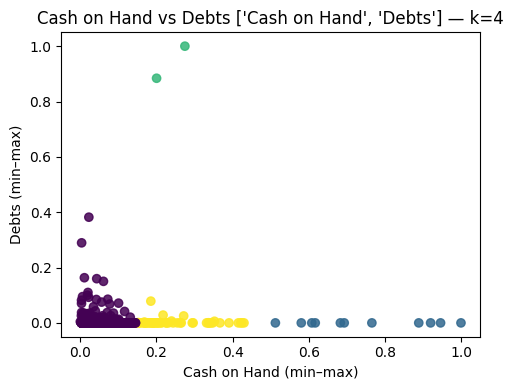

In [27]:
# Q2.3 For Cash on Hand and Debts
res_cd = run_pair_multi_k(
    df_money,
    ['Cash on Hand', 'Debts'],
    "Cash on Hand vs Debts",
    k_list=[3, 4]
)

After min–max scaling Cash on Hand and Debts, almost all dots sit near low debt, with a long spread to the right. The scree curve falls fast and then bends in the 3-4 range. Colored by clusters, the smallest two clusters are clear outliers, which are a tiny high-debt group (e.g., David Trone, Ron Johnson) and a small very-high-cash, near-zero-debt group (e.g., Adam Schiff, Chuck Schumer, Raphael Warnock, Tim Scott).

Compared with Raised vs Spent, which showed a clear more raised to more spent trend, Cash vs Debts is skewed because many candidates report zero debt, while a few top races hold very large cash balances or take big loans.

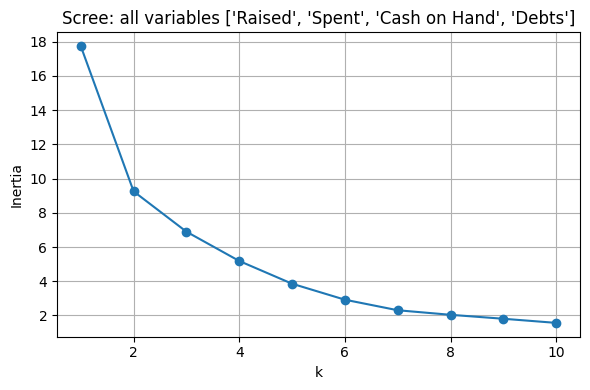


Cluster sizes (k=3):
    size
2     5
1    33
0   499


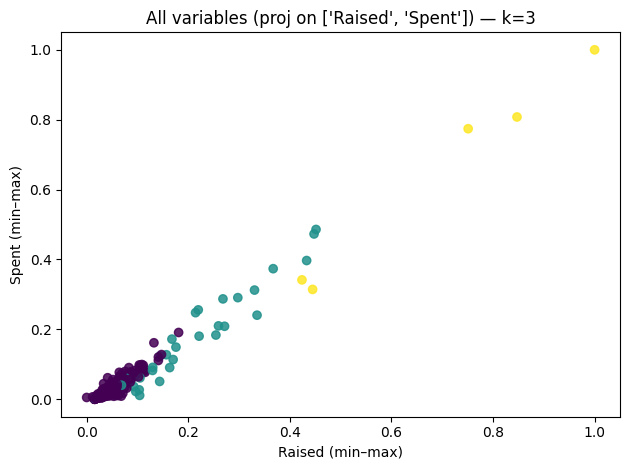


Cluster sizes (k=4):
    size
2     2
1     5
3    31
0   499


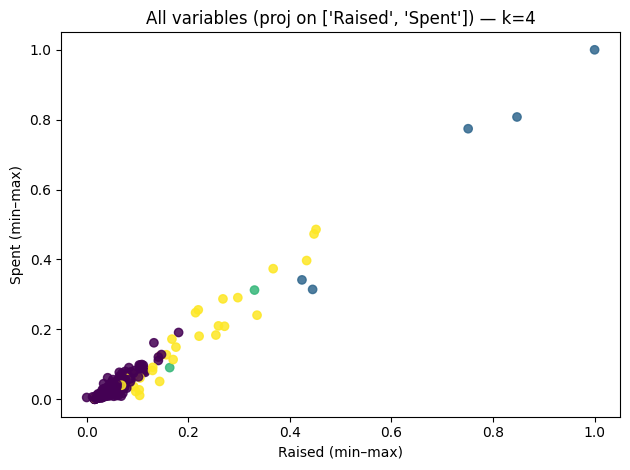


Cluster sizes (k=6):
    size
2     2
3     3
1     9
5    11
4    73
0   439


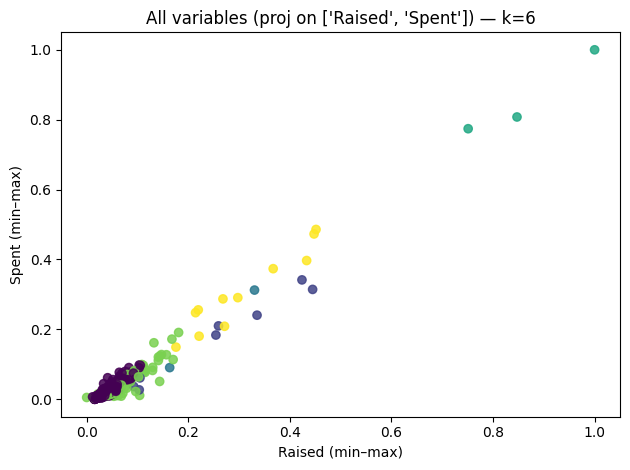


Cluster sizes (k=8):
    size
4     1
3     2
7     2
2     6
5    10
1    17
6   110
0   389


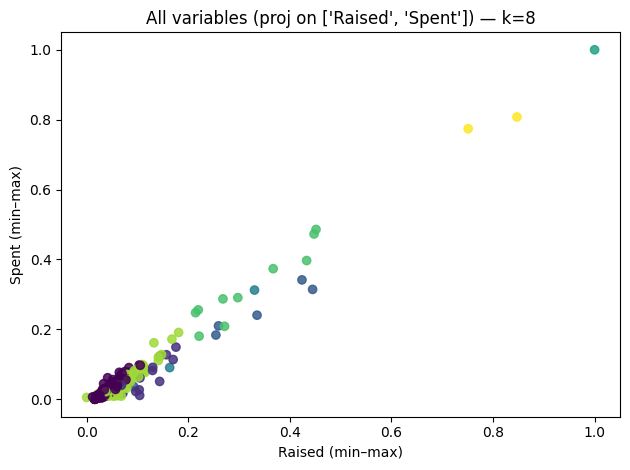

Not enough money columns detected to run the 4-variable step. Got: ['Raised', 'Spent', 'Cash on Hand', 'Debts']


In [28]:
# Q2.4 Use 𝑘 means clustering with all four numeric variables
RAISED_COL = 'Raised'
SPENT_COL = 'Spent'
CASH_COL = 'Cash on Hand'
DEBT_COL = 'Debts'

four = [c for c in [RAISED_COL, SPENT_COL, CASH_COL, DEBT_COL] if c]
use = [c for c in four if c in df_money.columns]
d4 = df_money.dropna(subset=use).copy()
X4 = minmax_scale(d4[use].to_numpy())

k_list_all = [3, 4, 6, 8]

inert4 = scree(d4, use, max_k=10, random_state=42) # Calculate inert4 using the scree function
plt.figure(figsize=(6,4))
plt.plot(list(range(1, 11)), inert4, marker="o") # Use range(1, 11) for ks
plt.title(f"Scree: all variables {use}")
plt.xlabel("k"); plt.ylabel("Inertia"); plt.grid(True); plt.tight_layout(); plt.show()

for k in k_list_all:
    km4 = KMeans(n_clusters=k, n_init=50, random_state=42).fit(X4)
    lab4 = km4.labels_
    sizes4 = pd.Series(lab4).value_counts().sort_values()
    print(f"\nCluster sizes (k={k}):\n", sizes4.to_frame("size"))

    plt.scatter(X4[:,0], X4[:,1], c=lab4, alpha=0.85)
    plt.title(f"All variables (proj on {use[:2]}) — k={k}")
    plt.xlabel(use[0] + " (min–max)")
    plt.ylabel(use[1] + " (min–max)")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough money columns detected to run the 4-variable step. Got:", four)

Using all four variables (Raised, Spent, Cash on Hand, Debts) shows a large cluster of low-dollar campaigns, a mid-tier group, and a few extreme outliers. Compared with results in Q2.2 and Q2.3, the model has the same structure, but it is more separated at the extremes.

In [ ]:
# Q2.5 Did the 𝑘-MC algorithm find useful patterns for you in analyzing the election?

Yes. k-means gave a clear big-picture of 2022 races. It separated a large group of low-fundraising campaigns from a small set of high-money outliers and flagged unusual cases with very high cash or high debt. That matches expectations: most campaigns are modest; a few Senate battles move tens of millions.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?